# PROBLEM STATEMENT 

The sinking of the Titanic on April 15th, 1912 is one of the most tragic tragedies in history. The Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers. The numbers of survivors were low due to the lack of lifeboats for all passengers and crew. Some passengers were more likely to survive than others, such as women, children, and upper-class. This case study analyzes what sorts of people were likely to survive this tragedy. The dataset includes the following:

Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
Sex: Sex
Age: Age in years
Sibsp: # of siblings / spouses aboard the Titanic
Parch: # of parents / children aboard the Titanic
Ticket: Ticket number
Fare: Passenger fare
Cabin: Cabin number
Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
Target class: Survived: Survival (0 = No, 1 = Yes)

# DATA SOURCE: https://www.kaggle.com/c/titanic

pandas as Excel: used for data manipulation.

Numpy for numerical analysis

Seaborn and matplotlib.pyplot for data cisualization with different plots

# STEP 1 : Importing libraries and loading training data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
training_set = pd.read_csv('Train_Titanic.csv')

In [3]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
training_set.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


# STEP 2 : Data visualization

In [5]:
survived = training_set[training_set['Survived']==1 ]
not_survived = training_set[training_set['Survived']==0 ]

In [6]:
print( "Total no of passengers: ", len(training_set))
print( "Total no of survived passengers: ", len(survived))
print( "Total no of passengers who did not survive: ", len(not_survived))

Total no of passengers:  891
Total no of survived passengers:  342
Total no of passengers who did not survive:  549


# -"1." in below print statement makes it float. 

# "*" helps to print every part of print spearated by comma separately with its own data type.

In [7]:
print("% Survived = ", 1. * len(survived)/len(training_set)*100, "%")
print("% Didn't Survive = ", 1. * len(not_survived)/len(training_set)*100, "%")

% Survived =  38.38383838383838 %
% Didn't Survive =  61.61616161616161 %


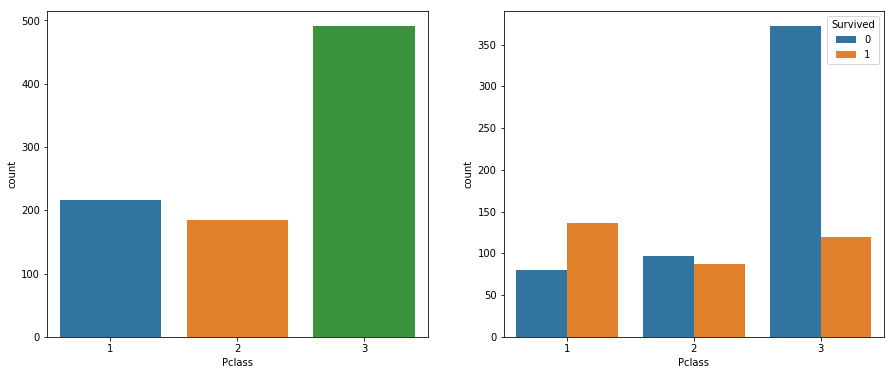

In [8]:
plt.figure(figsize =[15,6])
plt.subplot(121)
sns.countplot(x='Pclass', data= training_set)
plt.subplot(122)
sns.countplot(x='Pclass', hue='Survived', data= training_set)

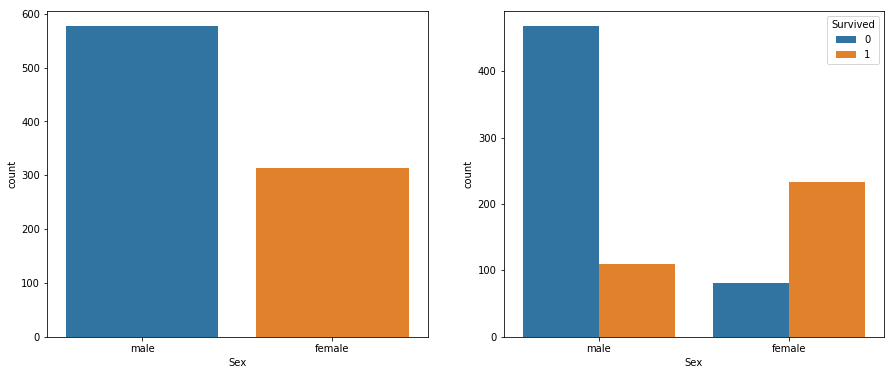

In [9]:
plt.figure(figsize = [15,6])
plt.subplot(121)
sns.countplot(x = 'Sex', data = training_set)
plt.subplot(122)
sns.countplot(x='Sex', hue='Survived', data = training_set)

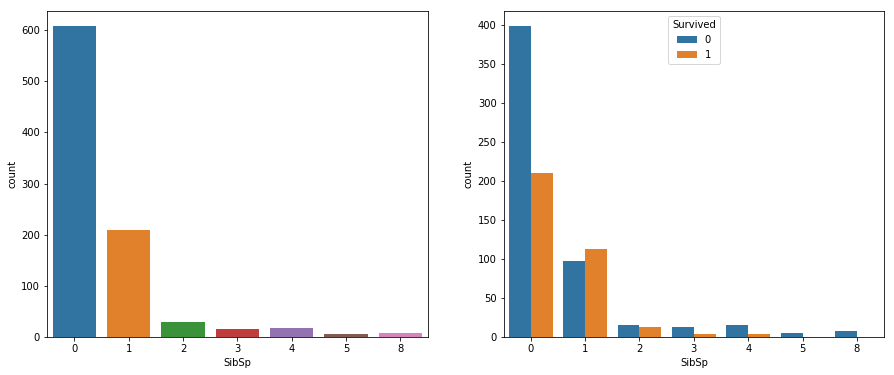

In [10]:
plt.figure(figsize = [15,6])
plt.subplot(121)
sns.countplot(x='SibSp', data=training_set)
plt.subplot(122)
sns.countplot(x='SibSp', hue='Survived', data=training_set)

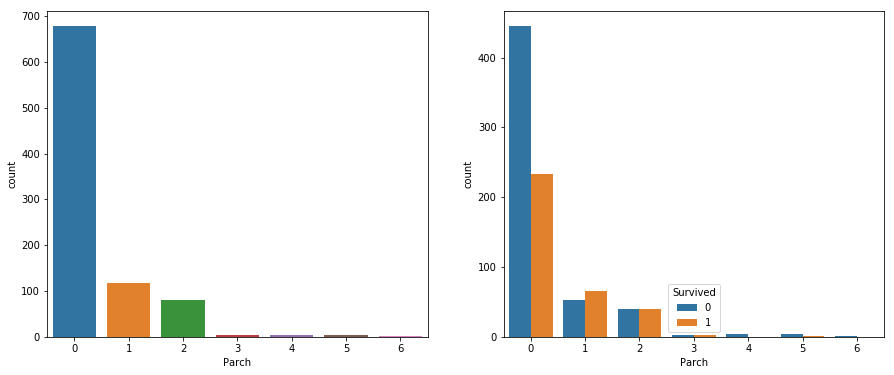

In [11]:
plt.figure(figsize=[15,6])
plt.subplot(121)
sns.countplot(x='Parch', data= training_set)
plt.subplot(122)
sns.countplot(x='Parch', hue='Survived', data= training_set)

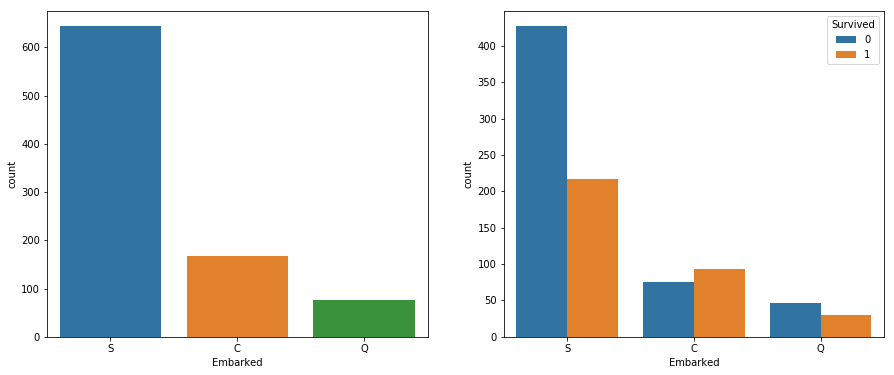

In [12]:
plt.figure(figsize=[15,6])
plt.subplot(121)
sns.countplot(x='Embarked',data = training_set)
plt.subplot(122)
sns.countplot(x='Embarked', hue='Survived', data= training_set)

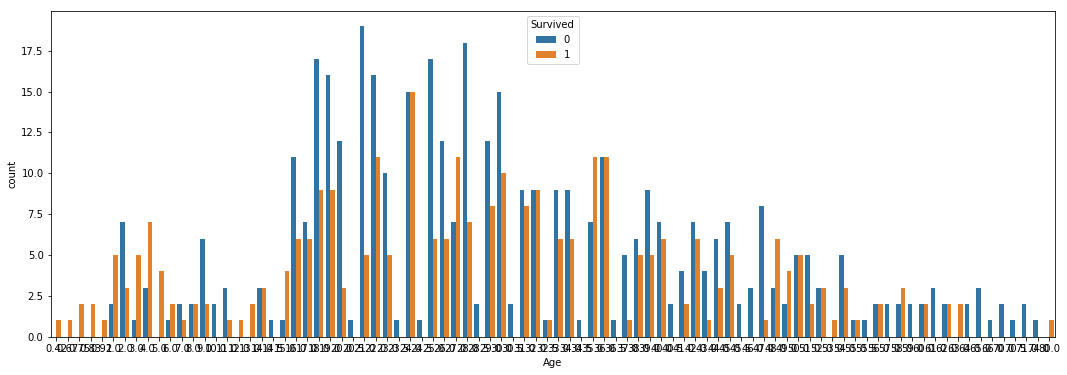

In [13]:
plt.figure(figsize=[18,6])
sns.countplot(x='Age', hue='Survived', data= training_set)

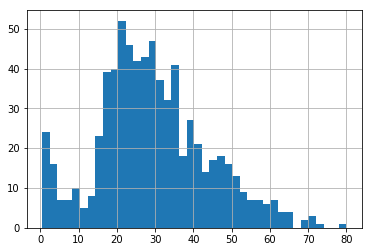

In [14]:
training_set['Age'].hist(bins=40)

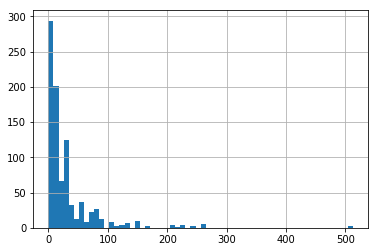

In [15]:
training_set['Fare'].hist(bins=60)

# STEP 3 : Data cleaning and Preprocessing

# First, drop the columns that are not required. For this, we use following command.

# --" axis= 1 " parameter means, consider the whole column. " inplace = True " means delete from actual dataset. 
# -- If we wanted to drop the column only for an operation, we should use " inplace = False ". 
# -- Both False and True cases implemented below:

In [16]:
training_set.drop('Cabin', axis=1, inplace = False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [17]:
training_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# As seen above, " inplace = False " made the column go only for that operation. As, we need to actually remove it , we will use True

In [18]:
training_set.drop('Cabin', axis = 1, inplace = True)

In [19]:
training_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# As it can be seen, cabin column is completely deleted.
# To drop multiple columns, do as follows :

In [20]:
training_set.drop(['Name', 'Ticket'], axis=1, inplace = True)

In [21]:
training_set

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


# Second, check the columns that have null data
# -- cmap can be Reds, Blues, Greens, Oranges
# -- cbar is that colour bar we see on the right side of graph ranging b/w 0-1

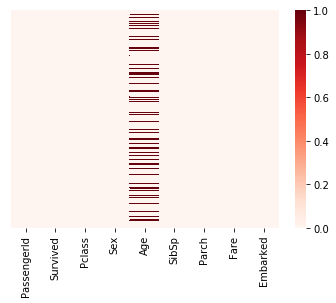

In [22]:
sns.heatmap(training_set.isnull(), yticklabels= False, cbar=True, cmap='Reds')

# Here, we see that there are lot of null values present only in the "Age" column. So, we will find out the average age sex wise and fill it in null values.

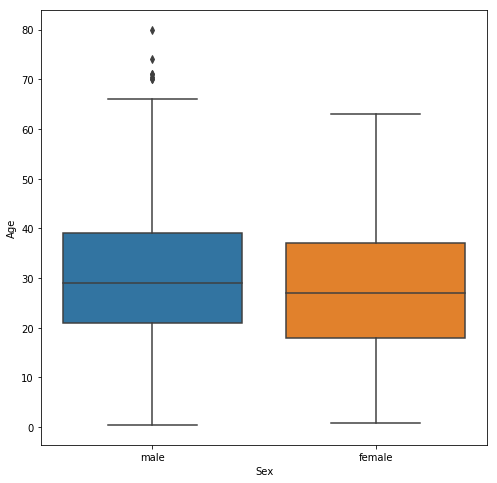

In [23]:
plt.figure(figsize=[8,8])
sns.boxplot(x='Sex', y='Age', data= training_set)

In [24]:
def fill_age(data):
    age = data[0]
    sex = data[1]
    
    if pd.isnull(age):
        if sex is 'male':
            return 29
        else:
            return 27
    else:
        return age

In [25]:
training_set['Age'] = training_set[['Age', 'Sex']].apply(fill_age, axis=1)

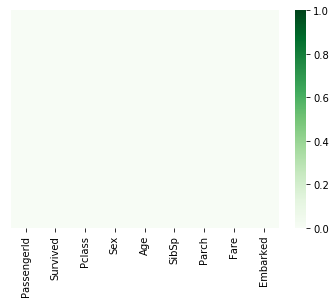

In [26]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=True, cmap='Greens')

# Thus, we have eliminated all the null values in our dataset

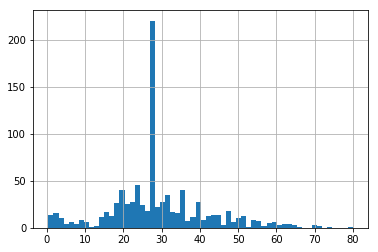

In [27]:
training_set['Age'].hist(bins=60)

In [28]:
training_set.drop(['PassengerId','Embarked'], axis=1, inplace=True)

In [29]:
training_set

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,27.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


# Third, converting text to numbers in columns

# Below code will give us 2 columns: male and female which will be waste of storage. So, inorder to take only one col, say male, we add para: drop_first.

In [30]:
male = pd.get_dummies(training_set['Sex'], drop_first = True )

In [31]:
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


# Now we will replace Sex col in main dataset with this male col.

In [32]:
training_set.drop('Sex', axis=1, inplace=True)

In [33]:
training_set = pd.concat([training_set, male], axis=1)

In [34]:
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,27.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


# Fourth, As our data cleaning is done, we will assign this data to x and y i.e. i/p and o/p variables

In [35]:
X = training_set.drop('Survived', axis=1).values

In [36]:
X

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  1.    ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    , 27.    ,  1.    ,  2.    , 23.45  ,  0.    ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ,  1.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ,  1.    ]])

In [37]:
y = training_set['Survived'].values

In [38]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

# STEP 4: MODEL TRAINING

# First, split data into training and testing

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Applying Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# STEP 5 : MODEL TESTING

# Prediction of test data

In [41]:
y_predict = classifier.predict(X_test)

In [42]:
y_predict

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

# Visualization

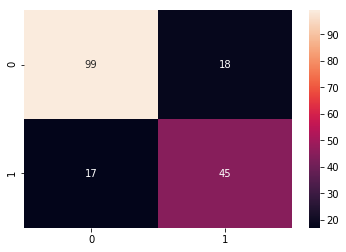

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='d')

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.71      0.73      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.80      0.80       179

